1) Business Understanding-> Approved or not
2) Analytic approach-> Supervised Learning(Binary classification)
3) Data Req and Data Collection
4) Data Understanding(Descriptive,Diagnostic)
5) Data Preparation
6) Modelling and evaluation
7)Deployment and feedback

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


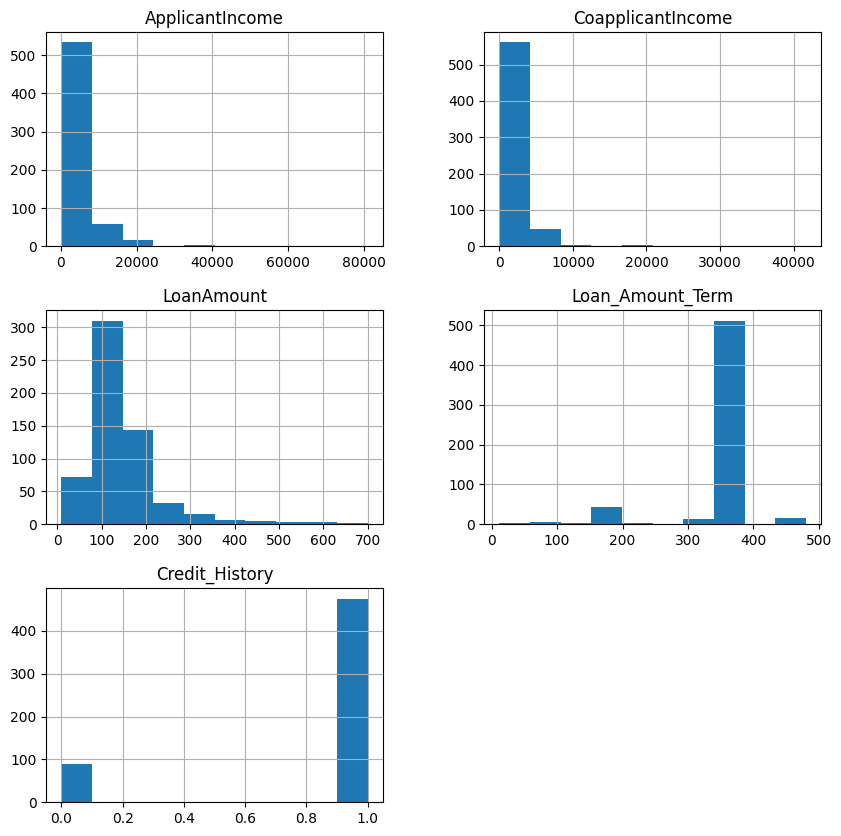

In [8]:
df.hist(figsize=(10,10))
plt.show()

<Axes: xlabel='ApplicantIncome'>

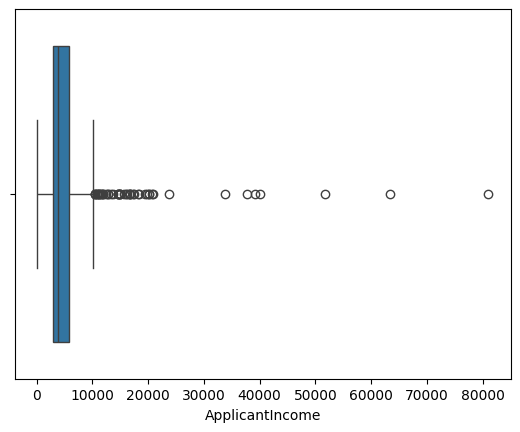

In [9]:
sns.boxplot(x="ApplicantIncome",data=df)

<Axes: xlabel='CoapplicantIncome'>

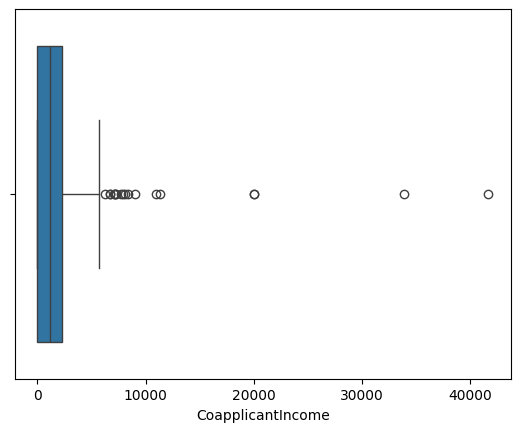

In [10]:
sns.boxplot(x="CoapplicantIncome",data=df)

<Axes: xlabel='LoanAmount'>

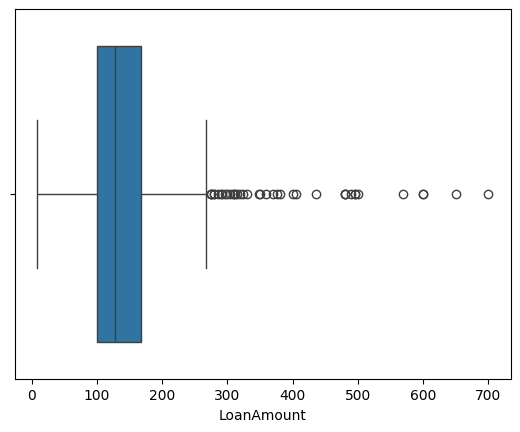

In [11]:
sns.boxplot(x="LoanAmount",data=df)

<Axes: xlabel='Loan_Amount_Term'>

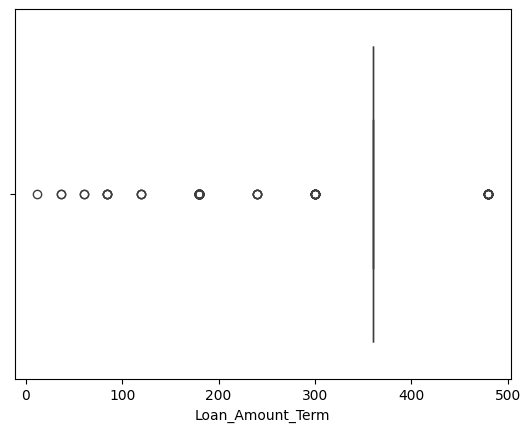

In [12]:
sns.boxplot(x="Loan_Amount_Term",data=df)

<Axes: xlabel='Credit_History', ylabel='count'>

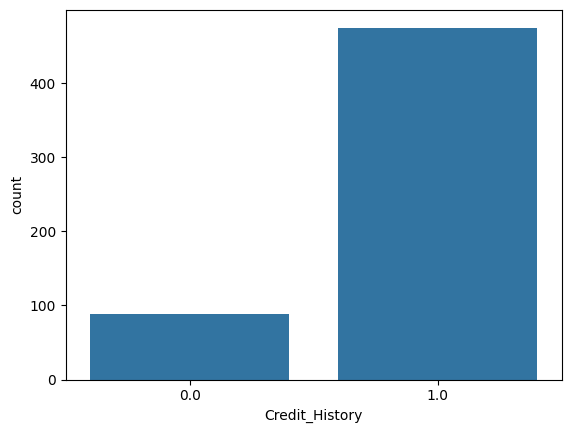

In [13]:
sns.countplot(x="Credit_History",data=df)

<Axes: xlabel='Loan_Status', ylabel='count'>

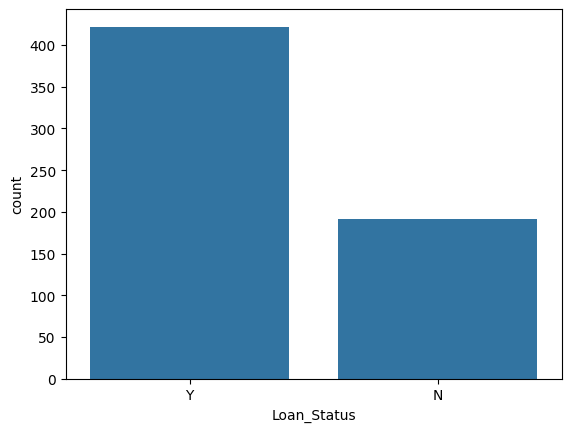

In [14]:
sns.countplot(x="Loan_Status",data=df)

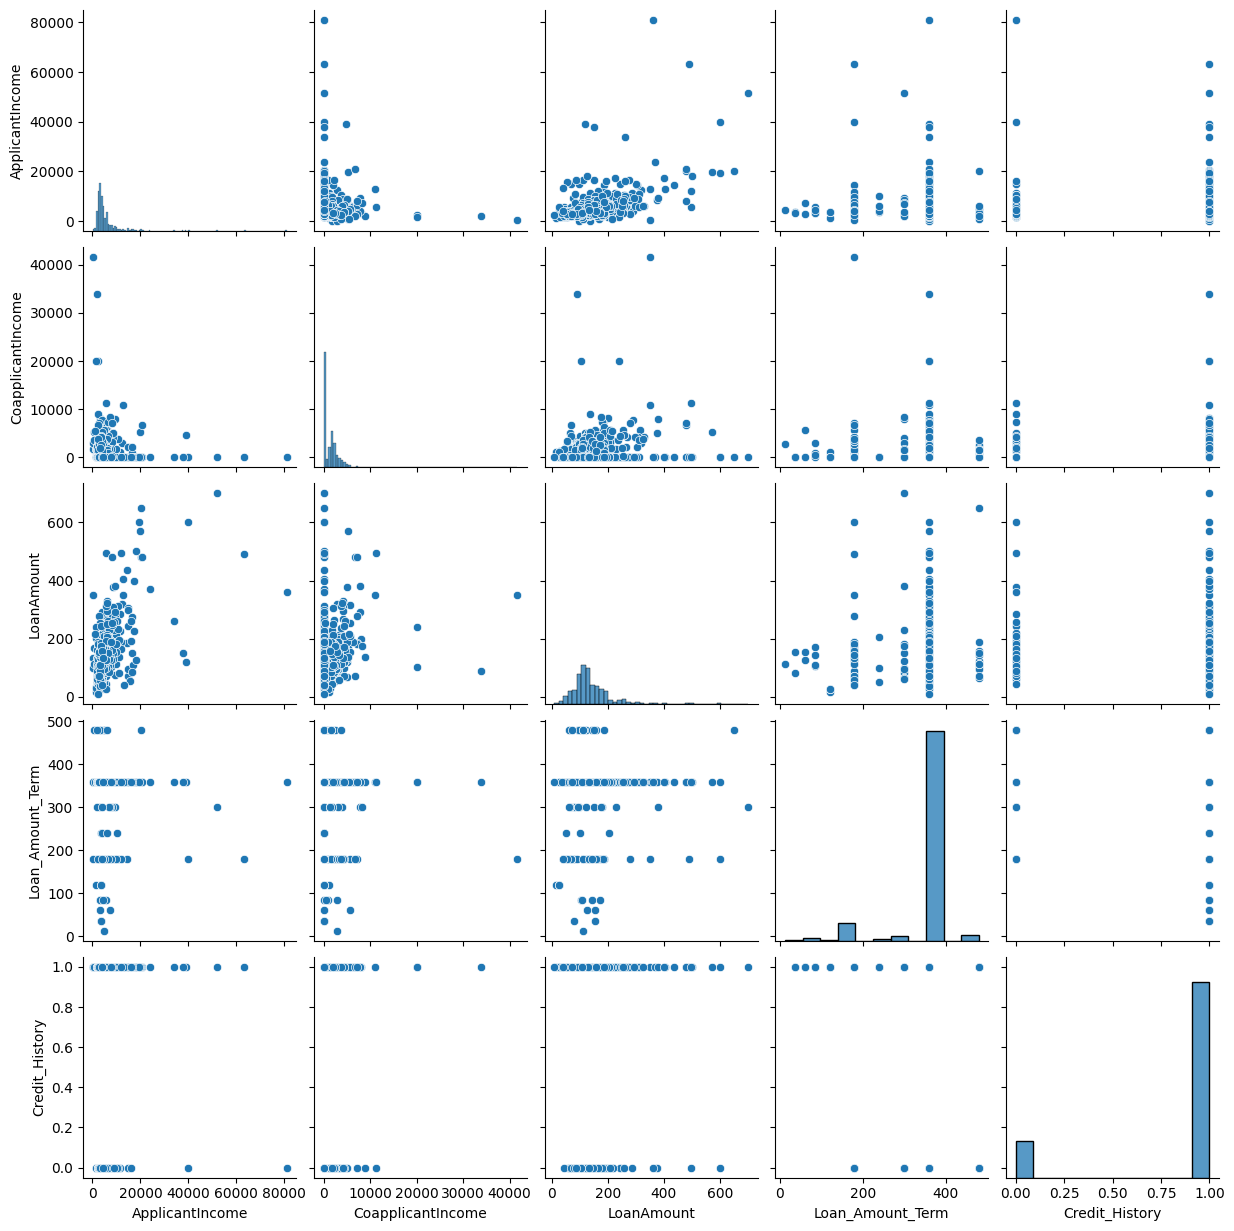

In [15]:
sns.pairplot(df)

In [16]:
df.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [17]:
## Handling missing values
loan_med=df["LoanAmount"].median()
loan_med

128.0

In [18]:
df["LoanAmount"]=df["LoanAmount"].replace(np.nan,loan_med)

In [19]:
term_med=df["Loan_Amount_Term"].median()
term_med

360.0

In [20]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].replace(np.nan,term_med)

In [21]:
credit_med=df["Credit_History"].median()
credit_med

1.0

In [22]:
df["Credit_History"]=df["Credit_History"].replace(np.nan,credit_med)

In [23]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [24]:
mode_gen=df["Gender"].mode()[0]
mode_gen

'Male'

In [25]:
df["Gender"]=df["Gender"].replace(np.nan,mode_gen)

In [26]:
mode_married=df["Married"].mode()[0]
mode_married

'Yes'

In [27]:
df["Married"]=df["Married"].replace(np.nan,mode_married)

In [28]:
mode_dep=df["Dependents"].mode()[0]
mode_dep

'0'

In [29]:
df["Dependents"]=df["Dependents"].replace(np.nan,mode_dep)

In [30]:
mode_self=df["Self_Employed"].mode()[0]
mode_self

'No'

In [31]:
df["Self_Employed"]=df["Self_Employed"].replace(np.nan,mode_self)

In [32]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [33]:
### Drop insignificant column/(s)
df=df.drop("Loan_ID",axis=1) # axis=1 means column,axis=0 means row

In [34]:
df.shape

(614, 12)

In [35]:
df=pd.get_dummies(df,columns=["Gender","Married","Dependents","Self_Employed","Property_Area","Education"])

In [36]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Education_Graduate,Education_Not Graduate
0,5849,0.0,128.0,360.0,1.0,Y,False,True,True,False,...,False,False,False,True,False,False,False,True,True,False
1,4583,1508.0,128.0,360.0,1.0,N,False,True,False,True,...,True,False,False,True,False,True,False,False,True,False
2,3000,0.0,66.0,360.0,1.0,Y,False,True,False,True,...,False,False,False,False,True,False,False,True,True,False
3,2583,2358.0,120.0,360.0,1.0,Y,False,True,False,True,...,False,False,False,True,False,False,False,True,False,True
4,6000,0.0,141.0,360.0,1.0,Y,False,True,True,False,...,False,False,False,True,False,False,False,True,True,False


In [37]:
df.dtypes

,0
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64
Loan_Status,object
Gender_Female,bool
Gender_Male,bool
Married_No,bool
Married_Yes,bool


In [38]:
df["Loan_Status"]=df["Loan_Status"].replace({"Y":1,"N":0})

<ipython-input-38-647256549>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Loan_Status"]=df["Loan_Status"].replace({"Y":1,"N":0})


In [39]:
df.dtypes

,0
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64
Loan_Status,int64
Gender_Female,bool
Gender_Male,bool
Married_No,bool
Married_Yes,bool


In [40]:
Y=df[["Loan_Status"]]
X=df.drop("Loan_Status",axis=1)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

In [43]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
model_log.score(X_train,Y_train)

0.8251748251748252

In [46]:
model_log.score(X_test,Y_test)

0.7837837837837838